# Problem Set 4
By: Bethany Bailey

## Problem 1
### (a)

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import numpy as np

autos = pd.read_csv("Auto.csv", na_values = "?")
#autos = autos.dropna()
autos.head(40)

/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [2]:
len(autos)
autos.isnull().sum()
autos.dropna(inplace=True)
autos.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

### (b)

<IPython.core.display.Javascript object>


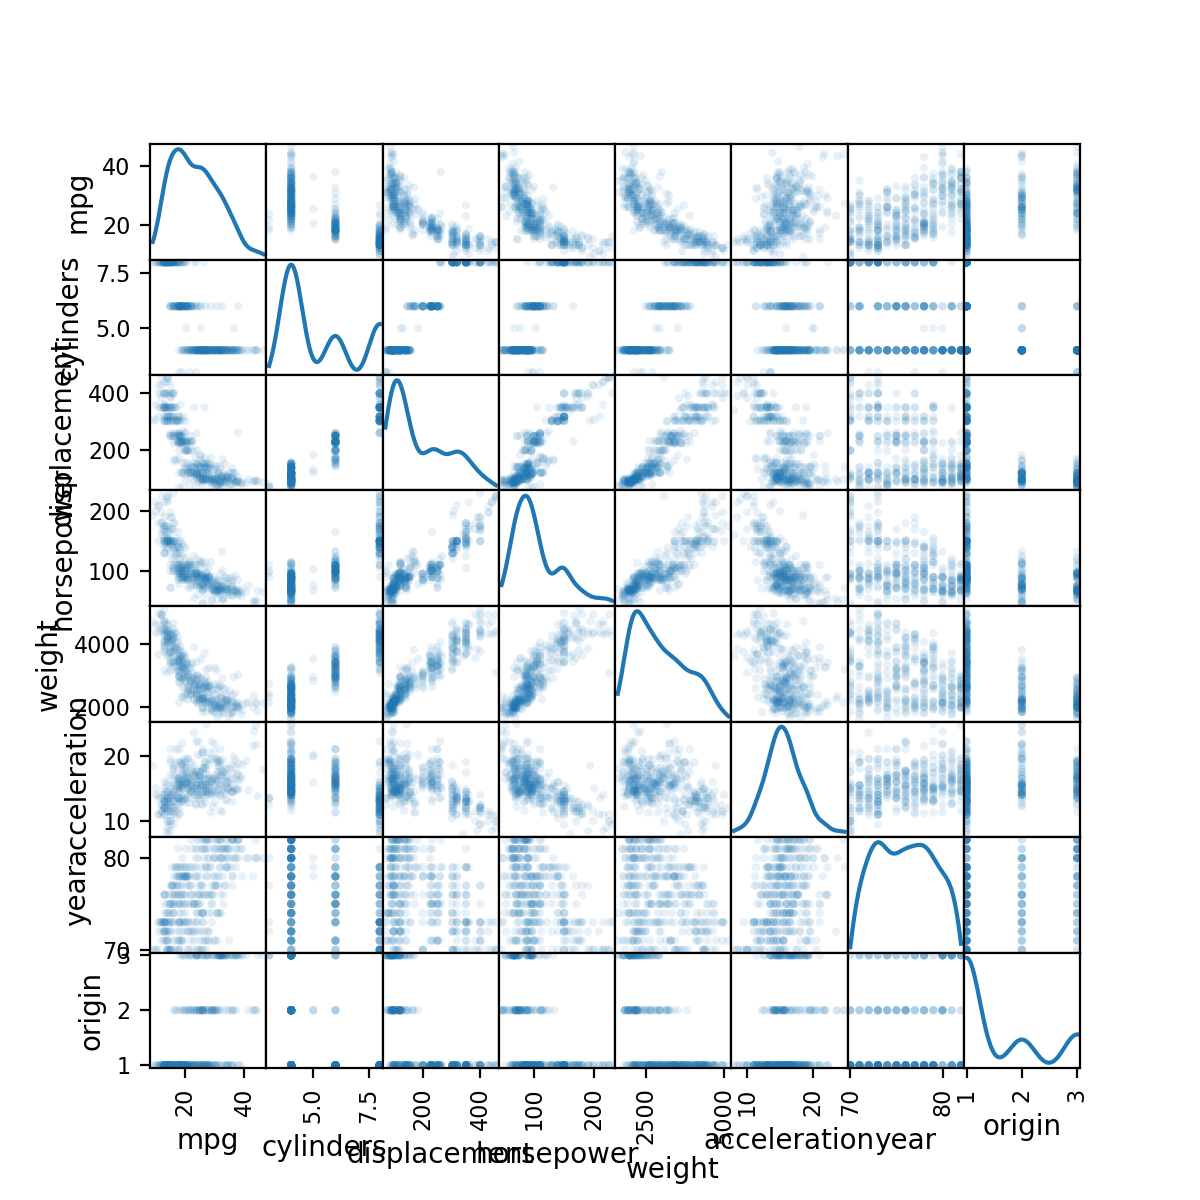

In [3]:
%matplotlib notebook

plt = scatter_matrix(autos, alpha=0.1, figsize=(6,6), diagonal="kde")

### (c)

In [4]:
autos.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### (d)

In [5]:
# Add a constant to the df.
autos["constant"] = 1
reg1 = sm.OLS(endog=autos['mpg'], exog=autos[['constant', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',\
    'year', 'origin']], missing='drop')
results = reg1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 05 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        09:07:16   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
constant       -17.2184      4.644     -3.707   

#### (i)

$\beta_2$ (dispacement), $\beta_4$ (weight), $\beta_6$ (year), and $\beta_7$ (origin) are statistically significant at the 1% level.

#### (ii)

$\beta_1$ (cylinders), $\beta_3$ (horsepower), and $\beta_5$ (acceleration) are not significant at the 10% level.

#### (iii)

A one unit change in $year_i$ results in an approximately 0.75 change in mpg units in $mpg_i$ when everything else is kept constant.

### (e)

Displacement, horsepower, and weight seem the most likely to have a nonlinear relationship with mpg.

#### (i)

In [6]:
autos['displacement_sq'] = autos.displacement ** 2
autos['horsepower_sq'] = autos.horsepower** 2
autos['weight_sq'] = autos.weight ** 2
autos['acceleration_sq'] = autos.acceleration ** 2

In [7]:
reg2 = sm.OLS(endog=autos['mpg'], exog=autos[['constant', 'cylinders', 'displacement', 'horsepower',
                                              'weight', 'acceleration', 'year', 'origin', 'displacement_sq', 
                                              'horsepower_sq', 'weight_sq', 'acceleration_sq']], missing='drop')
results2 = reg2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Mon, 05 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        09:07:16   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
constant           20.1084      6.696     

#### (ii)

The adjusted $R^2$ for the second regrssion is 0.866, which is better than the adjusted $R^2$ for the first regression in part (d) (0.818).

#### (iii)

The statistical significance of the $displacement_i$ variable coefficient was 0.008 in the first regression, but changed to 0.408 (much less significant) in the second regression with the squared terms. The coefficient also changed signs from positive to negative. The coefficient on its squared term is also not significant (0.532).

#### (iv)

$Cylinders_i$ went from 0.128 significance to 0.440 (much less significant). It is even less significant in the second regression. Also, the coefficient changed sign from negative to positive.

### (f)

In [8]:
p = results2.predict(exog = [1, 6, 200, 100, 3100, 15.1, 99, 1, 200**2, 100**2, 3100**2, 15.1**2])
print("The predicted miles per gallon for this car would be " + str(p[0]) + ".")

The predicted miles per gallon for this car would be 38.7321110966.


## Problem 2

### (a)

In [9]:
df = pd.DataFrame(data = {'X1' : [0, 2, 0 , 0, -1, 1],
              'X2' : [3, 0, 1, 1, 0, 1], 
              'X3' : [0, 0, 3, 2, 1, 1], 
              'Y' : ['Red', 'Red', 'Red', 'Green', 'Green', 'Red']})
df.index = np.arange(1,len(df)+1)
df

,X1,X2,X3,Y
1,0,3,0,Red
2,2,0,0,Red
3,0,1,3,Red
4,0,1,2,Green
5,-1,0,1,Green
6,1,1,1,Red


In [10]:
df['dist'] = ((df.X1 - 0)**2 + (df.X2 - 0)**2 + (df.X3 - 0)**2)**.5
df

,X1,X2,X3,Y,dist
1,0,3,0,Red,3.000000
2,2,0,0,Red,2.000000
3,0,1,3,Red,3.162278
4,0,1,2,Green,2.236068
5,-1,0,1,Green,1.414214
6,1,1,1,Red,1.732051


### (b)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn1 = KNeighborsClassifier(n_neighbors=1)

In [13]:
x = df.iloc[:,0:3]
y = df.iloc[:,3]

In [14]:
results_knn = knn1.fit(x, y)
print(results_knn.predict([(0,0,0)]))
print(knn1.kneighbors([(0,0,0)]))

['Green']
(array([[ 1.41421356]]), array([[4]]))


When K=1, only the closest neighbor is taken into account. Thus, only (-1,0,1) will be considered as a neighbor (which is 1.414 away), so green will be used to predict (0,0,0).

### (c)

In [15]:
knn3 = KNeighborsClassifier(n_neighbors=3)
results_knn3 = knn3.fit(x, y)
print(results_knn3.predict([(0,0,0)]))
print(knn3.kneighbors([(0,0,0)]))

['Red']
(array([[ 1.41421356,  1.73205081,  2.        ]]), array([[4, 5, 1]]))


When K=3, the three closest neighbors are taken into account. Thus, (-1,0,1) Green (1.414 away), (1,1,1) Red (1.732 away), and (2,0,0) Red (2 away) will be considered as neighbors, this will be predicted as Red.

### (d)

We would expect the best value for K to be small. This is because, as K gets large, the decision boundary gets smoother, but when it is small, its much more nuanced and rougher. Thus, if the decision boundary is highly nonlinear, we want a small K.

### (e)

In [16]:
knn2 = KNeighborsClassifier(n_neighbors=2)
results_knn2 = knn2.fit(x, y)
print(results_knn2.predict([(1,1,1)]))
print(knn2.kneighbors([(1,1,1)]))

['Green']
(array([[ 0.        ,  1.41421356]]), array([[5, 3]]))


## Problem 3

In [17]:
autos["mpg"].median()

22.75

In [18]:
autos['mpg_cat'] = pd.qcut(autos.mpg, 2, labels=False)
autos.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,constant,displacement_sq,horsepower_sq,weight_sq,acceleration_sq,mpg_cat
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,1,94249.0,16900.0,12278016,144.00,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,1,122500.0,27225.0,13638249,132.25,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,1,101124.0,22500.0,11806096,121.00,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,1,92416.0,22500.0,11785489,144.00,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,1,91204.0,19600.0,11895601,110.25,0
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500,1,184041.0,39204.0,18844281,100.00,0
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala,1,206116.0,48400.0,18957316,81.00,0
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii,1,193600.0,46225.0,18593344,72.25,0
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina,1,207025.0,50625.0,19580625,100.00,0
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl,1,152100.0,36100.0,14822500,72.25,0


In [19]:
autos_log = autos[['mpg_cat', 'constant', 'cylinders', 'displacement', 'horsepower',
                            'weight', 'acceleration', 'year', 'origin']].dropna()
autos_log.head(10)

,mpg_cat,constant,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,0,1,8,307.0,130.0,3504,12.0,70,1
1,0,1,8,350.0,165.0,3693,11.5,70,1
2,0,1,8,318.0,150.0,3436,11.0,70,1
3,0,1,8,304.0,150.0,3433,12.0,70,1
4,0,1,8,302.0,140.0,3449,10.5,70,1
5,0,1,8,429.0,198.0,4341,10.0,70,1
6,0,1,8,454.0,220.0,4354,9.0,70,1
7,0,1,8,440.0,215.0,4312,8.5,70,1
8,0,1,8,455.0,225.0,4425,10.0,70,1
9,0,1,8,390.0,190.0,3850,8.5,70,1


### (a)

In [20]:
y = autos_log.iloc[:,0]
Xplusconst = autos_log.iloc[:,1:9]

In [21]:
logit = sm.Logit(y, Xplusconst)
logit_results = logit.fit()
print(logit_results.summary())

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                mpg_cat   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Mon, 05 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        09:07:17   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
constant       -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626

The regressors that have coefficients that are statistically significant at the 5% level are weight and year.

### (b)

In [22]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xplusconst, y, test_size = 0.5, random_state=10)

/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### (c)

In [23]:
#logit2 = sm.Logit(y_train, X_train)
#logit_results2 = logit2.fit()
#print(logit_results2.summary())
# Use sklearn
LogReg = LogisticRegression()
results_train = LogReg.fit(X_train, y_train)
results_train.coef_

array([[-0.07364192, -0.70354514,  0.00651547, -0.03707011, -0.00505635,
        -0.13329315,  0.29944474, -0.15761073]])

In [24]:
results_train.intercept_

array([-0.07364192])

$\beta0$ is -0.0716, $\beta1$ is -0.6852 $\beta2$ is 0.0062, $\beta3$ is -0.0378, $\beta4$ is -0.0050, $\beta5$ is -0.13738, $\beta6$ is 0.2998, and $\beta7$ is -0.1546.

### (d)

In [25]:
y_pred = results_train.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0])

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics 
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[86, 13],
       [12, 85]])

In [27]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



This model predicts low mpg slightly better than high mpg, but the difference is small and almost insignificant.